In [2]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\data+science\data science\austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [66]:
# Check if the columns exist before dropping them
columns_to_drop = ["Events", "Date", "SeaLevelPressureAvgInches"]
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the existing columns
data.drop(existing_columns_to_drop, axis=1, inplace=True)


In [81]:
data = data.replace('T',0.0)
data = data.replace('-',0.0)

In [82]:
data.to_csv("austin_weather_final.csv")

In [83]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 

In [84]:
data = pd.read_csv("austin_weather_final.csv")

In [85]:
data

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,...,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,0,0,0,0,74,60,45,67.0,49.0,...,57.0,29.86,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,1,1,1,1,1,56,48,39,43.0,36.0,...,43.0,30.41,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,2,2,2,2,2,58,45,32,31.0,27.0,...,27.0,30.56,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,3,3,3,3,3,61,46,31,36.0,28.0,...,22.0,30.56,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,4,4,4,5,5,57,48,39,39.0,36.0,...,47.0,30.47,30.34,10.0,9.0,7.0,12.0,3.0,17.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,1190,1190,1190,1314,1314,103,89,75,71.0,67.0,...,25.0,30.04,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1191,1191,1191,1191,1315,1315,105,91,76,71.0,64.0,...,20.0,29.97,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1192,1192,1192,1192,1316,1316,107,92,77,72.0,64.0,...,19.0,29.91,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00
1193,1193,1193,1193,1317,1317,106,93,79,70.0,68.0,...,27.0,29.96,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00


In [86]:
X= data.drop(['PrecipitationSumInches'],axis = 1)
y= data["PrecipitationSumInches"]
data["PrecipitationSumInches"] = pd.to_numeric(data["PrecipitationSumInches"], errors="coerce")

data = data.dropna(subset=["PrecipitationSumInches"])

X = data.drop(["PrecipitationSumInches"], axis=1)
y = data["PrecipitationSumInches"]

Y = y.values.reshape(-1, 1)

In [87]:
day_index = 798
days= [i for i in range(y.size)]

In [88]:
clf = LinearRegression()

clf.fit(X,Y)

LinearRegression()

The precipitation trend graph:


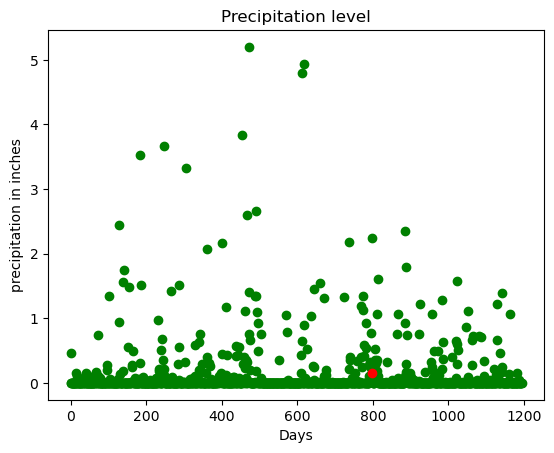

In [89]:
print("The precipitation trend graph:")
plt.scatter(days,Y,color = 'g')
plt.scatter(days[day_index],Y[day_index],color = 'r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel('precipitation in inches')
plt.show()

In [94]:
x_vis = x.filter(['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

The precipitation vs attributes trend graph:


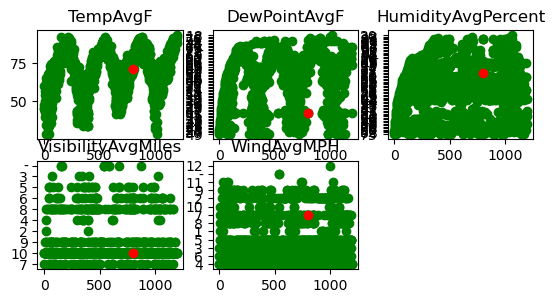

In [96]:
print("The precipitation vs attributes trend graph:")
for i in range(x_vis.columns.size):
    plt.subplot(3,3,i+1)
    plt.scatter(days,x_vis[x_vis.columns.values[i][:100]],color = 'g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index],color = 'r')
    plt.title(x_vis.columns.values[i])
plt.show()    